# Exploration of R packages for building report tool for 16S amplicon data
This notebook contains code for trying out various R pacakges for building a tool to provide analysis report for 16S data.

### 1. Qiime2R
This packages offers an interface to Qiime2 artificat. This can come very handy to process `.qza` files and avoid the need to reinventing the wheel to do the same.



In [1]:
if (!requireNamespace("devtools", quietly = TRUE)){install.packages("devtools")}
devtools::install_github("jbisanz/qiime2R") # current version is 0.99.20

Skipping install of 'qiime2R' from a github remote, the SHA1 (fb7a907f) has not changed since last install.
  Use `force = TRUE` to force installation



In [3]:

library('qiime2R')

asv_table <- read_qza('./asv/trial-asv-table.qza')
taxo_table <- read_qza('./asv/trial-tax_sklearn.qza')
metadata <- readr::read_tsv('./metadata.tsv')
tree <- read_qza('./asv/tree/trial-rooted-tree.qza')

parsed_taxa <- parse_taxonomy(taxo_table$data)

Rows: 90 Columns: 42
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (32): sample-id, investigation_type, project_name, experimental_factor, ...
dbl  (3): lib_size, host_taxid, samp_store_temp
lgl  (7): submitted_to_insdc, sample_mat_process, sample_size, pcr_primers, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
metadata <- readr::read_tsv('./metadata.tsv')
metadata$age <- as.numeric(as.character(metadata$age))

Rows: 90 Columns: 42
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (32): sample-id, investigation_type, project_name, experimental_factor, ...
dbl  (3): lib_size, host_taxid, samp_store_temp
lgl  (7): submitted_to_insdc, sample_mat_process, sample_size, pcr_primers, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“NAs introduced by coercion”


Warning message:
“Removed 90 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


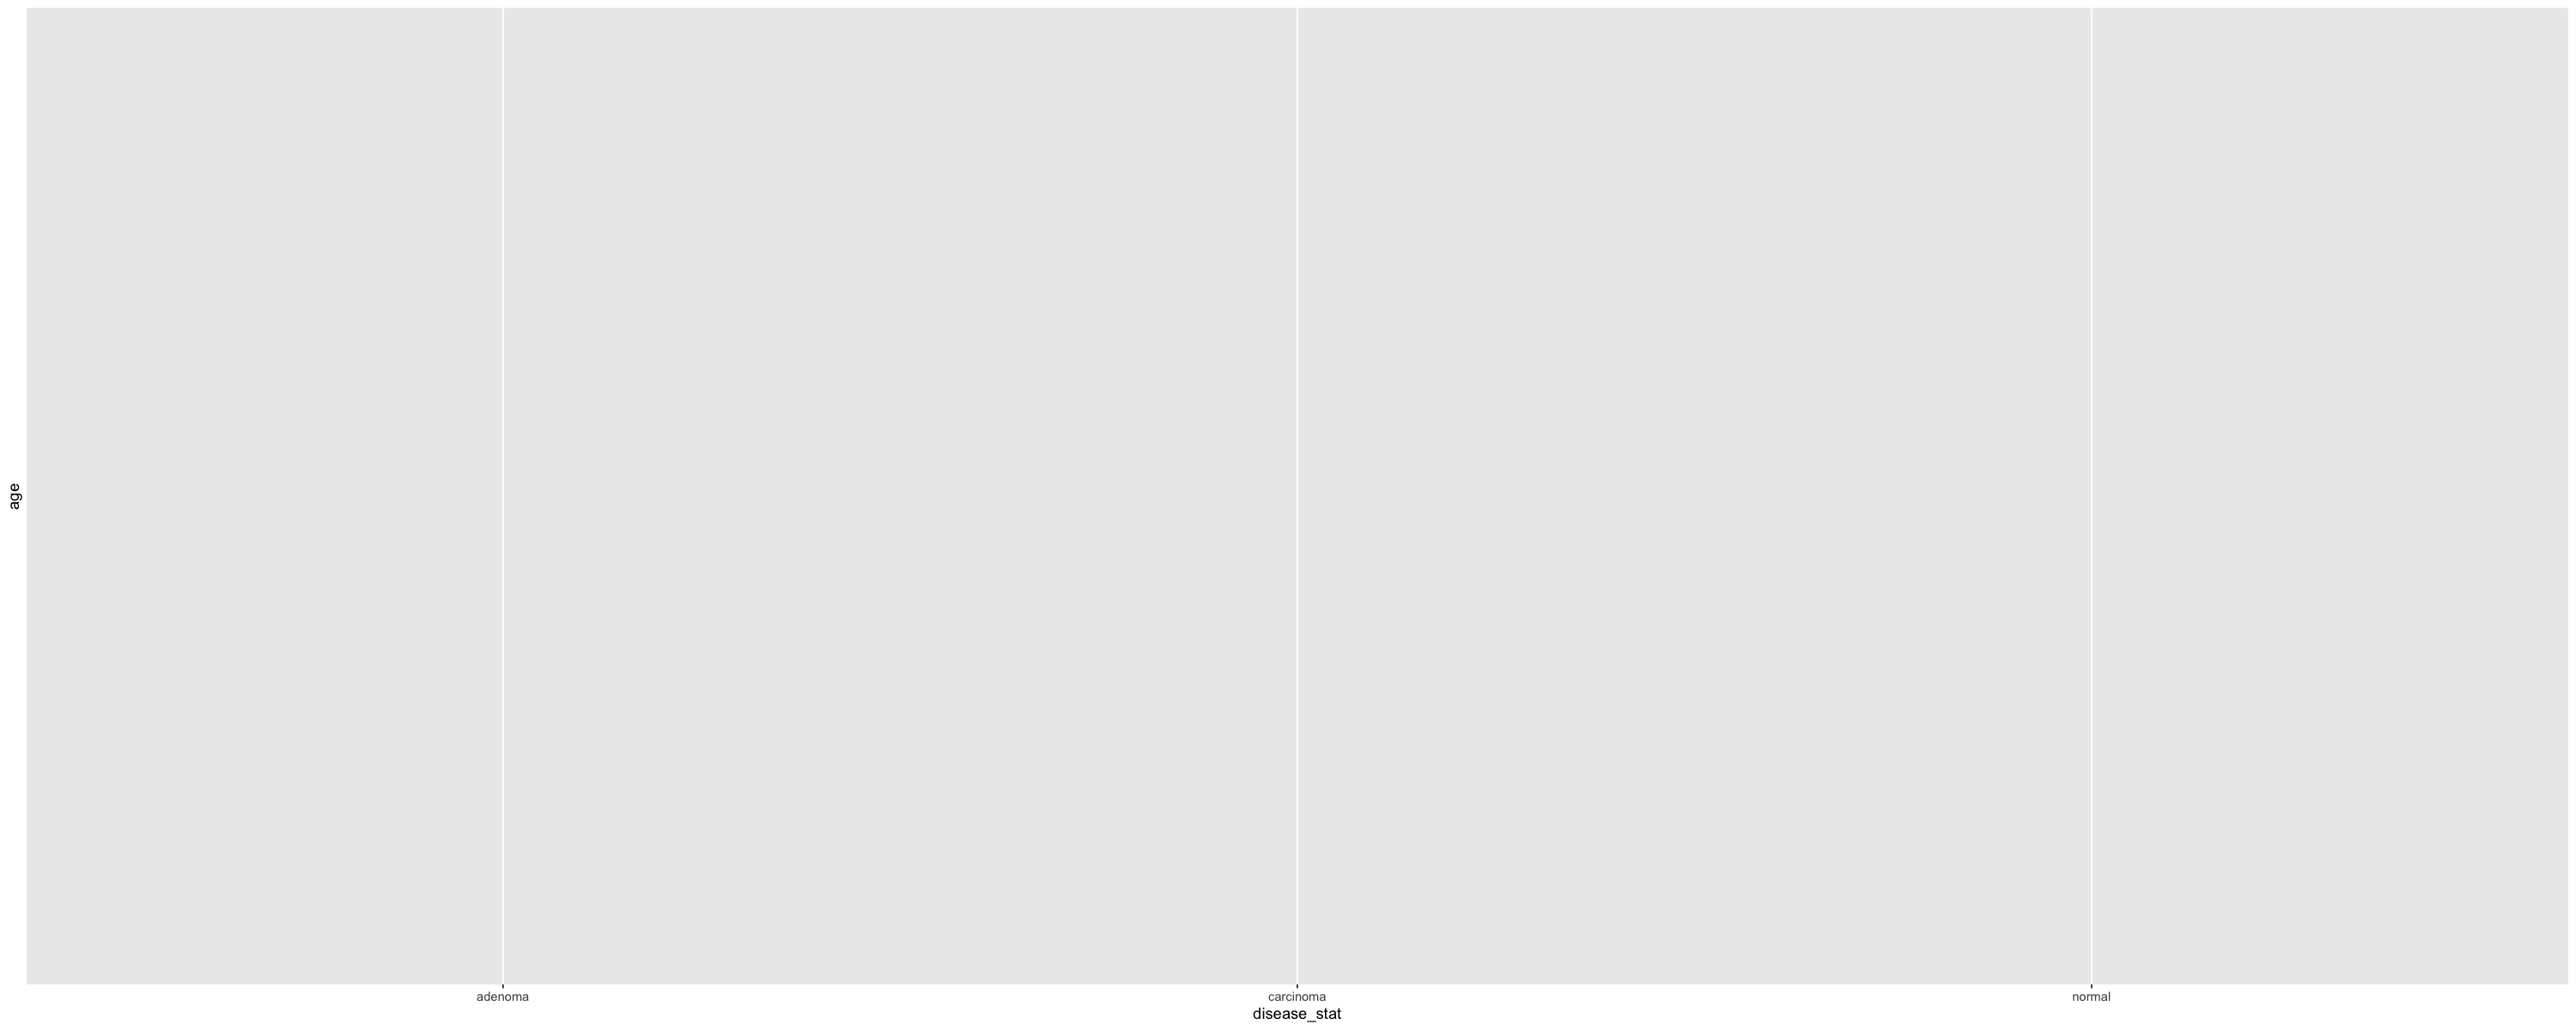

In [106]:
ggplot(metadata, aes(disease_stat, age)) + geom_boxplot()

In [5]:
# Creating physeq object
physeq <-qza_to_phyloseq(
    features = './asv/trial-asv-table.qza',
    tree = './asv/tree/trial-rooted-tree.qza',
    './asv/trial-tax_sklearn.qza',
    './metadata.tsv')


In [6]:
saveRDS(physeq,'demo.RDS')

In [7]:
p1 <- readRDS('demo.RDS')

In [8]:
library('phyloseq')
library('tibble')
library('ggplot2')
library('dplyr')
library('tidyr')
library('ape')
library('vegan')
library('stringr')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Loading required package: permute

Loading required package: lattice



In [12]:
plot1 <- plot_richness(p1,x='disease_stat')

In [15]:
colnames(plot1$data)

[1] "submitted_to_insdc"  "investigation_type"  "project_name"       
 [4] "experimental_factor" "geo_loc_name"        "biome"              
 [7] "feature"             "material"            "env_package"        
[10] "samp_collect_device" "sample_mat_process"  "sample_size"        
[13] "nucl_acid_ext"       "nucl_acid_amp"       "lib_size"           
[16] "lib_const_meth"      "target_gene"         "target_subfragment" 
[19] "sfffile_id_R1"       "sfffile_id_R2"       "pcr_primers"        
[22] "mid"                 "adapters"            "pcr_cond"           
[25] "seq_meth"            "seq_qual_check"      "chimera_check"      
[28] "url"                 "host_common_name"    "host_taxid"         
[31] "host_subject_id"     "age"                 "sex"                
[34] "disease_stat"        "body_product"        "tot_height.cm."     
[37] "tot_mass.kg."        "host_race"           "FOBT.result"        
[40] "Medications"         "samp_store_temp"     "samples"            
[43] "variable"            "value"               "se"

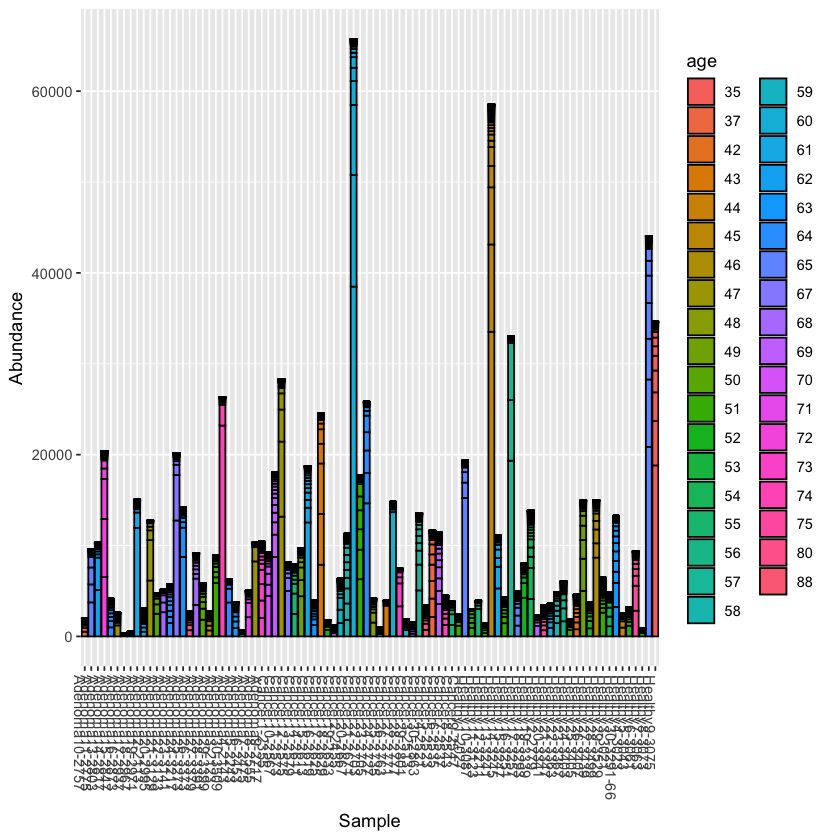

In [32]:
plot_bar(p1, fill='age')

In [40]:
meta <- read.table('./metadata.tsv', sep="\t", header=TRUE)

meta$tot_height.cm.

[1] "177  "        "175  "        "177  "        "180"          "173  "       
 [6] "180"          "170  "        "152  "        "170  "        "180  "       
[11] "164  "        "155  "        "176  "        "167  "        "177  "       
[16] "154  "        "173  "        "171  "        "162  "        "170"         
[21] "160  "        "165  "        "182  "        "157  "        "170  "       
[26] "170  "        "177  "        "175  "        "162  "        "180  "       
[31] "167"          "175"          "185"          "185"          "177"         
[36] "180"          "157"          "175"          "167"          "172"         
[41] "157"          "167"          "172"          "not provided" "193"         
[46] "167"          "170  "        "180"          "165"          "177"         
[51] "182"          "172"          "167"          "182"          "154  "       
[56] "175"          "165"          "149  "        "185"          "185  "       
[61] "167  "        "157  "        "177  "        "152  "        "165  "       
[66] "170  "        "162  "        "182  "        "167  "        "167  "       
[71] "139  "        "172"          "162"          "177"          "162"         
[76] "152  "        "165"          "162  "        "170"          "170"         
[81] "175  "        "177  "        "167  "        "170  "        "172  "       
[86] "190  "        "165  "        "162"          "162"          "160  "

In [12]:
BiocManager::install(c("phyloseq", "microbiome", "ComplexHeatmap"), update = FALSE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'phyloseq'”
Installing package(s) 'microbiome', 'ComplexHeatmap'

also installing the dependencies ‘DEoptimR’, ‘tensorA’, ‘robustbase’, ‘bayesm’, ‘compositions’, ‘GetoptLong’, ‘clue’, ‘doParallel’





The downloaded binary packages are in
	/var/folders/hh/gyd1cnc93nj8sffbhmnpbrfr0000gn/T//RtmpL0pO6m/downloaded_packages


In [13]:
library(microViz)

Warning message:
“package ‘microViz’ was built under R version 4.4.2”
microViz version 0.12.6 - Copyright (C) 2021-2024 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For citation details, run: `citation("microViz")`
✖ Silence? `suppressPackageStartupMessages(library(microViz))`


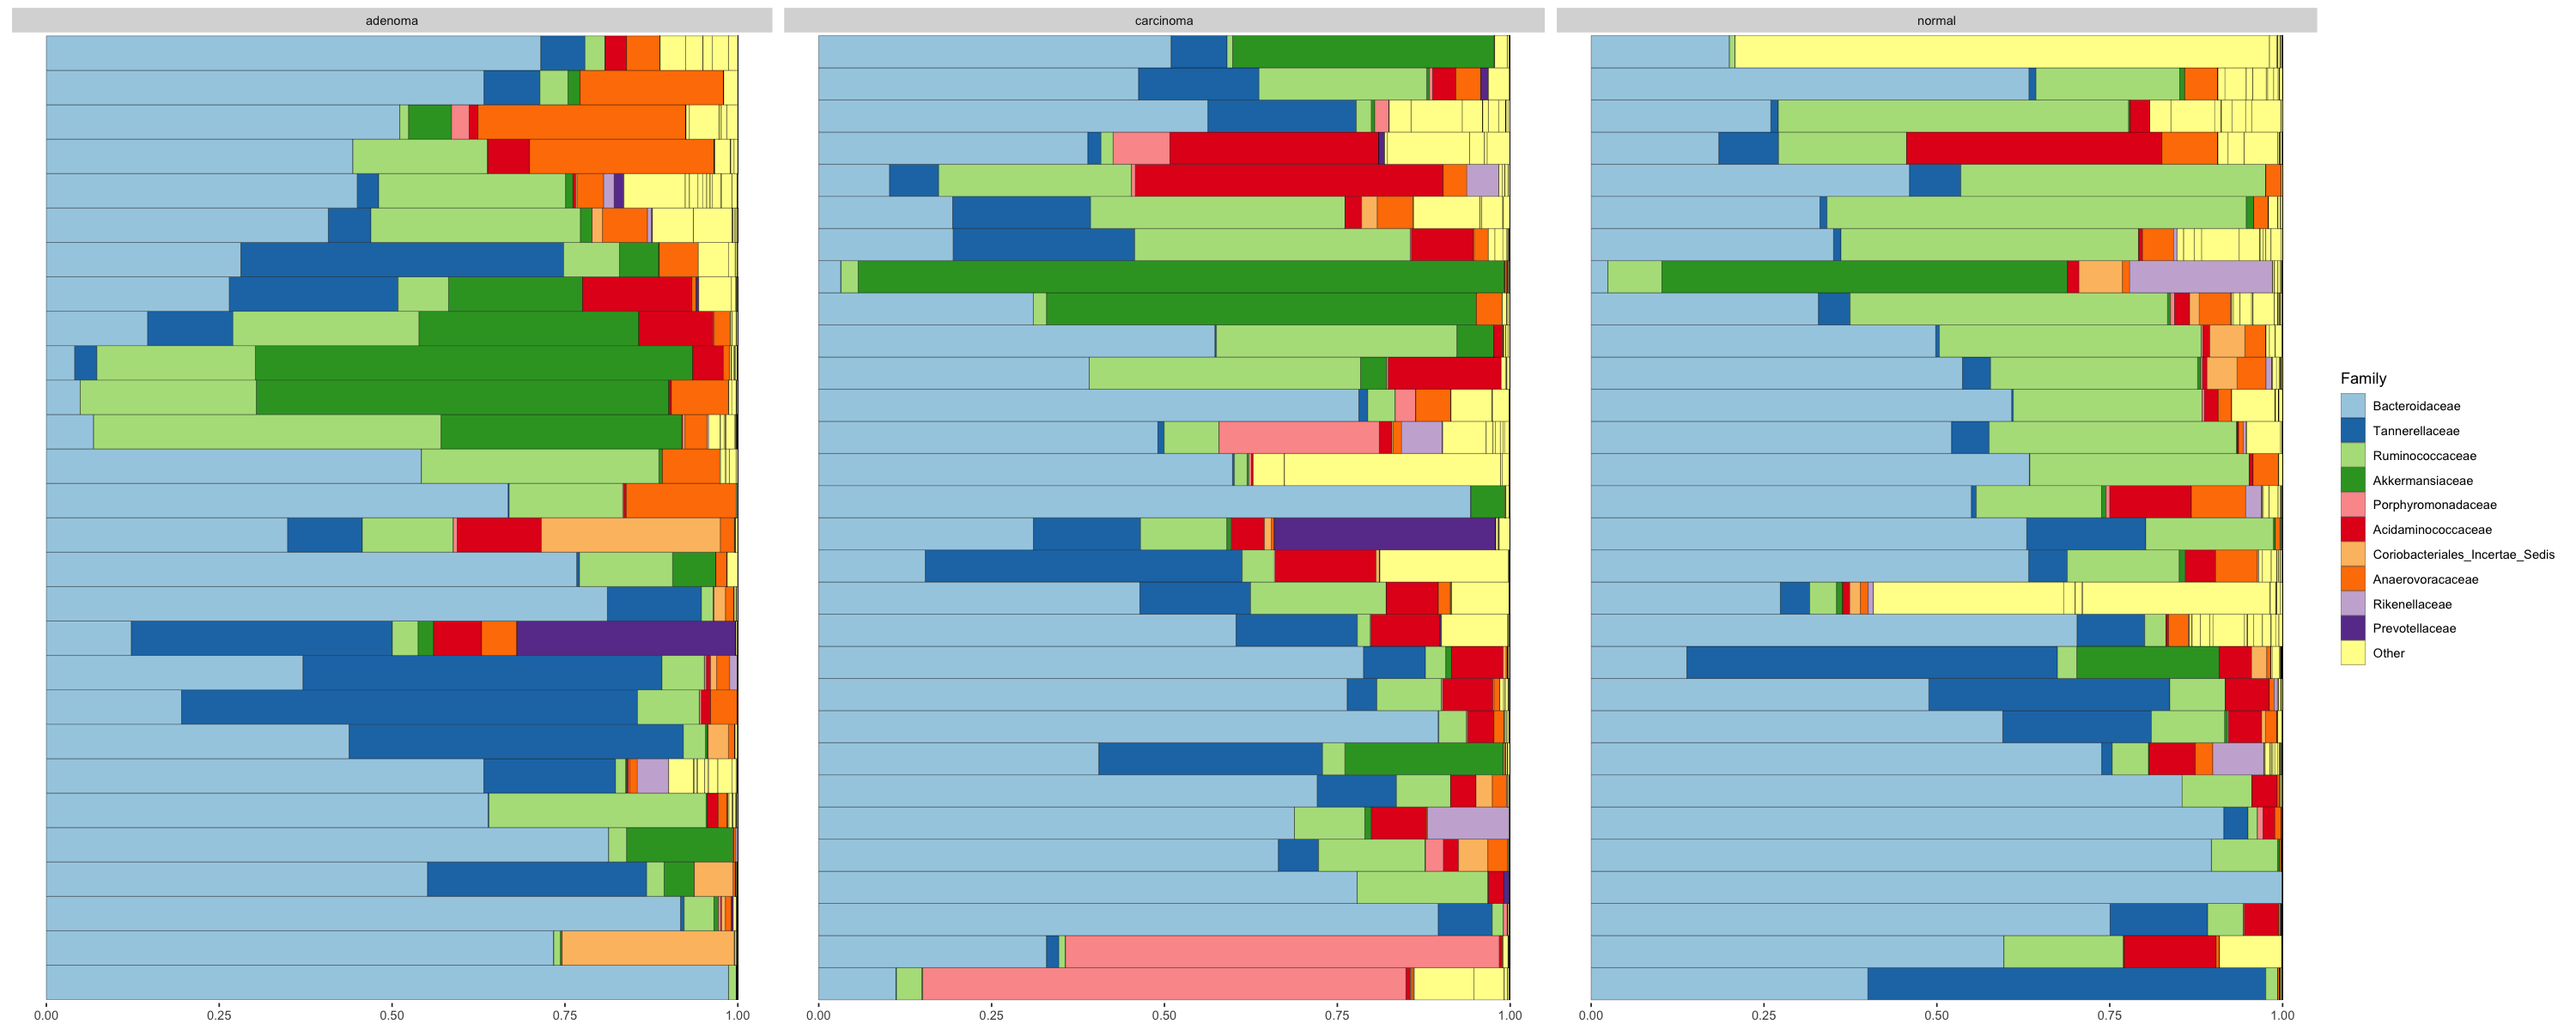

In [44]:
options(repr.plot.width = 25, repr.plot.height = 10)
t %>%
    comp_barplot(
        tax_level = "Family", n_taxa = 10, other_name = "Other",
        palette = distinct_palette(n=20, add='grey90'),
        merge_other = FALSE, bar_outline_colour='black') +
coord_flip() +
facet_wrap('disease_stat', nrow=1, scales='free')  +
  labs(x = NULL, y = NULL) +
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())


In [19]:
t <- tax_fix(physeq)

Warning message in plot_ordination(p1, ord, type = "samples", color = "SampleType", :
“Color variable was not found in the available data you provided.No color mapped.”


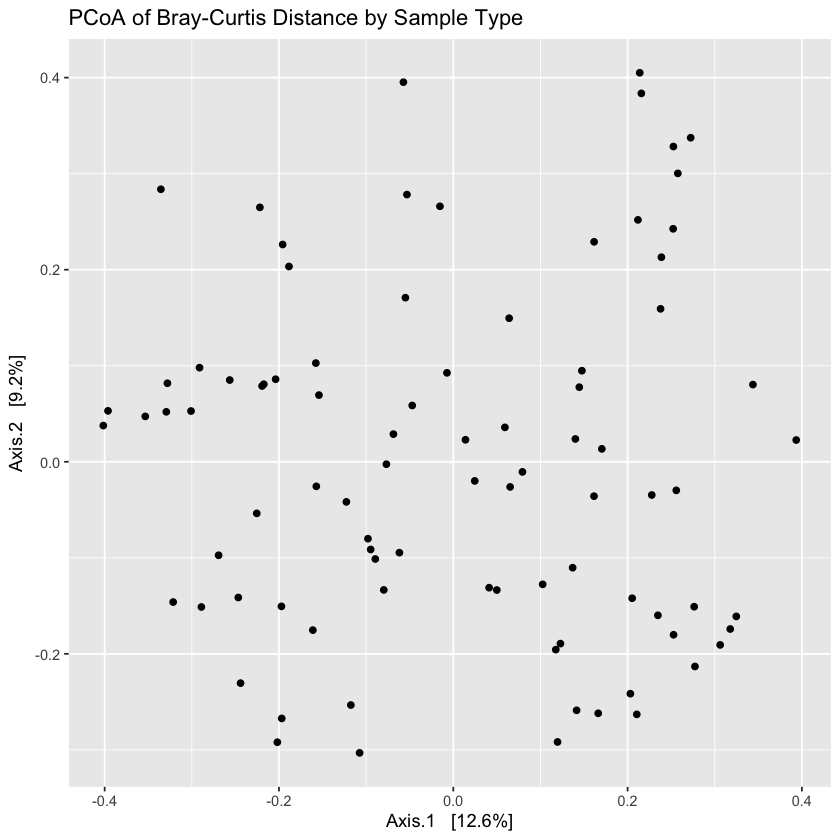

In [38]:
ord <- ordinate(p1, "PCoA", "bray")

plot_ordination(p1, ord, type="samples", color = "SampleType", title = "PCoA of Bray-Curtis Distance by Sample Type")

In [41]:
taxa <- sample(tax_top(t, n=50), size=30)

## Basic plots

In [24]:
phy <- psmelt(physeq)

In [10]:
write.csv(phy,'melted-phyloseq.csv')

In [51]:
library('speedyseq')

Loading required package: phyloseq


Attaching package: ‘speedyseq’


The following objects are masked from ‘package:phyloseq’:

    filter_taxa, plot_bar, plot_heatmap, plot_tree, psmelt, tax_glom,
    tip_glom, transform_sample_counts




In [19]:
colnames(phy)

[1] "OTU"                 "Sample"              "Abundance"          
 [4] "submitted_to_insdc"  "investigation_type"  "project_name"       
 [7] "experimental_factor" "geo_loc_name"        "biome"              
[10] "feature"             "material"            "env_package"        
[13] "samp_collect_device" "sample_mat_process"  "sample_size"        
[16] "nucl_acid_ext"       "nucl_acid_amp"       "lib_size"           
[19] "lib_const_meth"      "target_gene"         "target_subfragment" 
[22] "sfffile_id_R1"       "sfffile_id_R2"       "pcr_primers"        
[25] "mid"                 "adapters"            "pcr_cond"           
[28] "seq_meth"            "seq_qual_check"      "chimera_check"      
[31] "url"                 "host_common_name"    "host_taxid"         
[34] "host_subject_id"     "age"                 "sex"                
[37] "disease_stat"        "body_product"        "tot_height.cm."     
[40] "tot_mass.kg."        "host_race"           "FOBT.result"        
[43] "Medications"         "samp_store_temp"     "Kingdom"            
[46] "Phylum"              "Class"               "Order"              
[49] "Family"              "Genus"

In [25]:
phy$Abundance <- as.numeric(phy$Abundance)
phy$age <- as.numeric(str_trim(phy$age))
phy$tot_mass.kg <- as.numeric(str_trim(phy$tot_mass.kg))
phy$age <- as.numeric(str_trim(phy$age))
age

Warning message:
“NAs introduced by coercion”


[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [25] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [73] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [145] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [217] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [289] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [313] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [337] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [361] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [385] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [409] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [433] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [457] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [481] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [505] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [529] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [553] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [577] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [601] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [625] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [649] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [673] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [697] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [721] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [745] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [769] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [793] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [817] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [841] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [865] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [889] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [913] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [937] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [961] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [985] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1009] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1033] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1057] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1081] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1105] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1129] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1153] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1177] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [12

In [29]:
str(phy)

'data.frame':	67056 obs. of  50 variables:
 $ OTU                : chr  "1da22753739fe32b3fb3562945b8119c" "1f3e0aeb84dfac4b8a45e9573792618e" "8b626baac44f242364966bd6e06016f7" "dbfe91eaff06622521d05d42274f1c49" ...
 $ Sample             : chr  "Cancer21-2671" "Healthy13-3241" "Adenoma30-3509" "Healthy8-3073" ...
 $ Abundance          : num  38490 33520 23203 20854 19339 ...
 $ submitted_to_insdc : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ investigation_type : chr  "metagenomic" "metagenomic" "metagenomic" "metagenomic" ...
 $ project_name       : chr  "The Gut Microbiome Improves Predictive Models for Diagnosis of Colorectal Cancer" "The Gut Microbiome Improves Predictive Models for Diagnosis of Colorectal Cancer" "The Gut Microbiome Improves Predictive Models for Diagnosis of Colorectal Cancer" "The Gut Microbiome Improves Predictive Models for Diagnosis of Colorectal Cancer" ...
 $ experimental_factor: chr  "Gut microbiome and presence of colonic legions" "Gut microbiome and 

In [30]:
install.packages("stringr", dependencies=TRUE)


also installing the dependencies ‘V8’, ‘reactR’, ‘rex’, ‘bigD’, ‘juicyjuice’, ‘reactable’, ‘covr’, ‘gt’





The downloaded binary packages are in
	/var/folders/hh/gyd1cnc93nj8sffbhmnpbrfr0000gn/T//Rtmpy5gvkE/downloaded_packages


In [31]:
require(stringr)

# References

1. https://otagoedna.github.io/edna_workshop_june2021/chapters/06_importing_into_R.html
2. https://sw1.github.io/teaching/phyloseq.html

In [77]:
BiocManager::install("SIAMCAT")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'SIAMCAT'

also installing the dependencies ‘globals’, ‘listenv’, ‘future’, ‘future.apply’, ‘mlbench’, ‘mlr3measures’, ‘mlr3misc’, ‘palmerpenguins’, ‘bbotk’, ‘mlr3’, ‘beanplot’, ‘glmnet’, ‘gridBase’, ‘LiblineaR’, ‘pROC’, ‘PRROC’, ‘infotheo’, ‘corrplot’, ‘lmerTest’, ‘mlr3learners’, ‘mlr3tuning’, ‘paradox’, ‘lgr’





The downloaded binary packages are in
	/var/folders/hh/gyd1cnc93nj8sffbhmnpbrfr0000gn/T//RtmpL0pO6m/downloaded_packages


Old packages: 'rbiom', 'spatial', 'survival', 'systemfonts', 'testthat'



In [78]:
require("devtools")
devtools::install_github(repo = 'zellerlab/siamcat')

Loading required package: devtools

Loading required package: usethis


Attaching package: ‘devtools’


The following object is masked from ‘package:permute’:

    check





Skipping 15 packages ahead of CRAN: Biobase, BiocGenerics, zlibbioc, GenomeInfoDbData, GenomeInfoDb, XVector, IRanges, S4Vectors, rhdf5filters, Rhdf5lib, rhdf5, multtest, Biostrings, biomformat, phyloseq



── R CMD build ─────────────────────────────────────────────────────────────────
✔  checking for file ‘/private/var/folders/hh/gyd1cnc93nj8sffbhmnpbrfr0000gn/T/RtmpL0pO6m/remotes31835903650/zellerlab-siamcat-6fcb862/DESCRIPTION’ (352ms)
─  preparing ‘SIAMCAT’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘SIAMCAT_2.7.2.tar.gz’
   


In [11]:
library("SIAMCAT")

## Siamcat
How to use SIAMCAT



In [95]:
label <- create.label(meta=sample_data(sc2),
    label = "disease_stat",
    case = c("carcinoma"))

Label used as case:
   carcinoma
Label used as control:
   rest

+ finished create.label.from.metadata in 0.004 s



In [92]:
sc1  = transform_sample_counts(p1, function(x) x / sum(x) )

sc2 = filter_taxa(sc1, function(x) var(x) > 1e-5, TRUE)

In [91]:
sc1

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 762 taxa and 88 samples ]:
sample_data() Sample Data:        [ 88 samples by 41 sample variables ]:
tax_table()   Taxonomy Table:     [ 762 taxa by 7 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 762 tips and 761 internal nodes ]:
taxa are rows

In [96]:
sc.obj <- siamcat(phyloseq=sc2, label = label)

+ starting validate.data

+++ checking overlap between labels and features

+ Keeping labels of 88 sample(s).

+++ checking sample number per class

+++ checking overlap between samples and metadata

+ finished validate.data in 0.035 s



In [98]:
sc.obj <- filter.features(sc.obj, filter.method='abundance',cutoff=0.001)

Features successfully filtered



In [99]:
sc.obj <- check.associations (sc.obj, log.n0=1e-06, alpha=.05)


[==============================================================>--------]  89%

[===============================================================>-------]  90%

[================================================================>------]  91%

[=================================================================>-----]  92%

[==================================================================>----]  94%

[==================================================================>----]  95%

[===================================================================>---]  96%

[====================================================================>--]  97%

[=====================================================================>-]  99%

[=======================================================================] 100%
                                                                              



### ATTENTION: Not plotting to a pdf-file.
### The plot is optimized for landscape DIN-A4 (or similar) layout.
### Please make sure that your plotting region is large enough!!!
### Use at your own risk...



Are you sure that you want to continue? (Yes/no/cancel)  yes


Less than 5 associations found. Consider changing your alpha value.



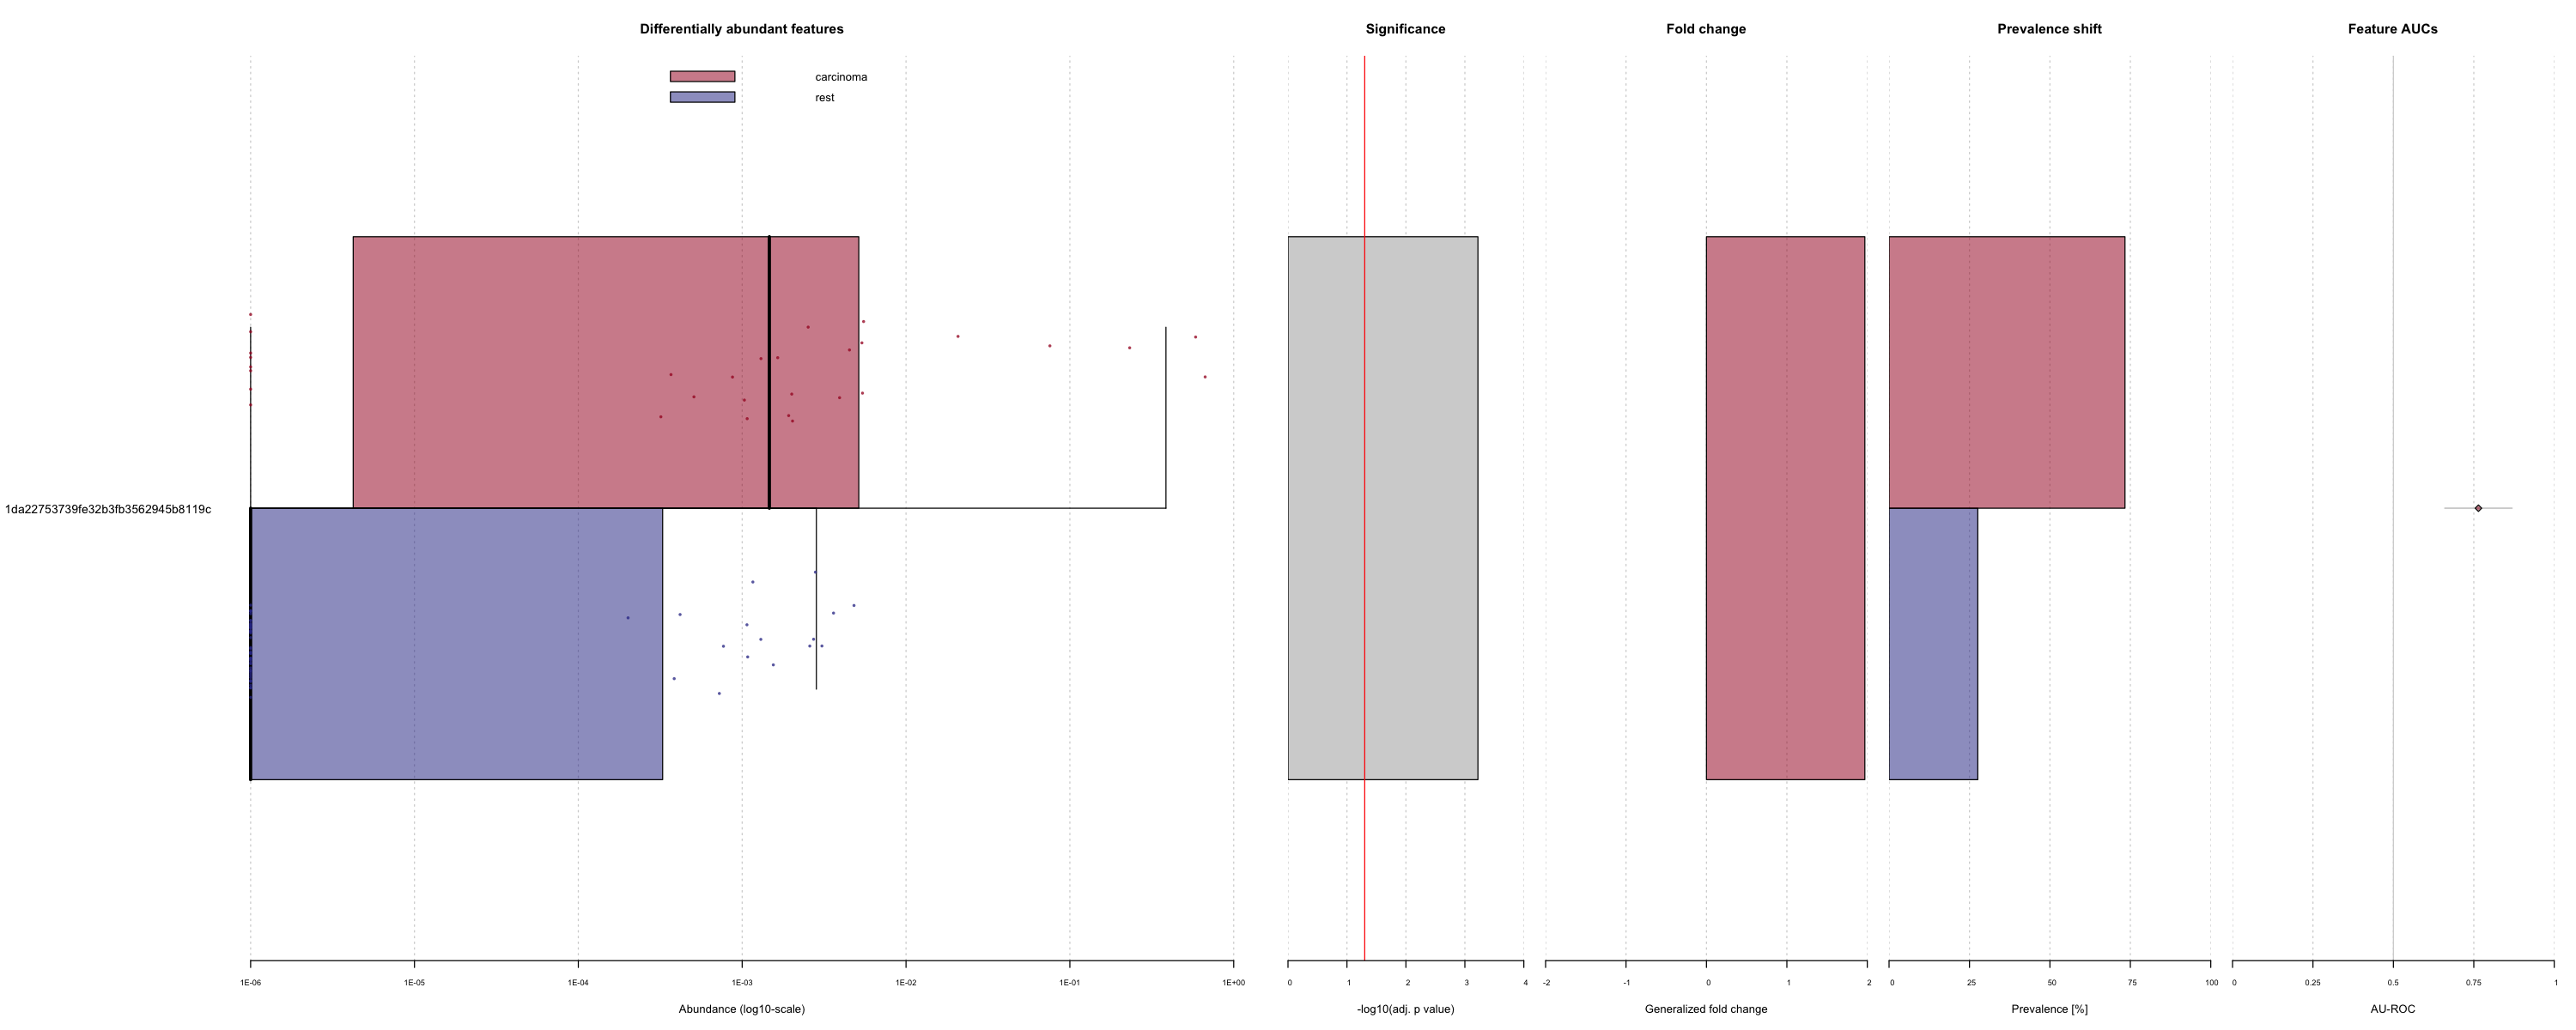

In [101]:
association.plot(sc.obj, sort.by='fc', panels = c("fc","prevalence","auroc"))